# Demonstration of Gaussian Errors

In [61]:
import sys
sys.path.append('..')

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns

from constants import N_REALS

sns.set()

In [62]:

dfs = []

for i in [0]:
    df_cur = pd.read_csv(f'../data/processed/processed_daysahead3_R{i:03d}.csv', index_col=0)
    df_cur.index = pd.to_datetime(df_cur.index)
    dfs.append(df_cur)

df = pd.concat(dfs)
df

,sigma,Vp_pred,Vp_obs
2010-01-06 18:00:00,60.024994,304.787500,317.801667
2010-01-07 00:00:00,56.502523,308.300000,307.610000
2010-01-07 06:00:00,56.086581,316.100000,293.158333
2010-01-07 12:00:00,49.940925,309.375000,282.966667
2010-01-07 18:00:00,52.316099,302.650000,283.506667
...,...,...,...
2020-12-27 18:00:00,80.546863,331.900000,491.780000
2020-12-28 00:00:00,102.325815,336.000000,504.466667
2020-12-28 06:00:00,107.737104,332.283333,532.033333
2020-12-28 12:00:00,119.429580,328.566667,477.500000


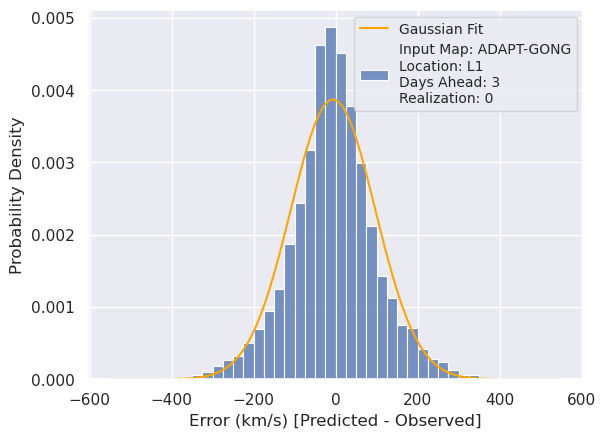

In [63]:
bins = np.arange(-500, 510, 25)
error = df.Vp_pred - df.Vp_obs
error = error.dropna()

plt.figure()
sns.histplot(error, bins=bins, label='Input Map: ADAPT-GONG\nLocation: L1\nDays Ahead: 3\nRealization: 0', stat='density')
plt.ylabel('Probability Density')
plt.xlabel('Error (km/s) [Predicted - Observed]')


mean, std =norm.fit(error)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y, color='orange', label='Gaussian Fit')
plt.legend(fontsize=10)
